In [1]:
pwd

'/Users/mukeshchaudhary/Desktop/chicago-102819/module_1/week_3-project'

In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# import data and creat Dataframe for cleaning
original_tmdbmovies_df = pd.read_csv("tmdb.movies.csv")
tmdbmovies_df =original_tmdbmovies_df.copy()

In [17]:
#remove unname column of Dataframe

tmdbmovies_df=tmdbmovies_df.loc[:,~tmdbmovies_df.columns.str.contains('^Unname')]

In [18]:
tmdbmovies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
tmdbmovies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [20]:
tmdbmovies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [21]:
tmdbmovies_df['movies_name']=tmdbmovies_df['original_title']

tmdbmovies_df.info()

In [22]:
original_moviebudget=pd.read_csv('tn.movie_budgets.csv')
moviebudget_df=original_moviebudget.copy()

In [23]:
moviebudget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [24]:
moviebudget_df['movie'].value_counts()

King Kong                       3
Halloween                       3
Home                            3
Teenage Mutant Ninja Turtles    2
20,000 Leagues Under the Sea    2
                               ..
The Night Visitor               1
Grace Unplugged                 1
Hotel Transylvania 2            1
Contraband                      1
To Save a Life                  1
Name: movie, Length: 5698, dtype: int64

In [25]:
moviebudget_df['movie'].astype('str')

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [26]:
moviebudget_df['releaseyear']=moviebudget_df['release_date'].month

AttributeError: 'Series' object has no attribute 'month'

In [27]:
#check duplicate
moviebudget_df[moviebudget_df.duplicated(keep=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [28]:
moviebudget_df['movies_name']=moviebudget_df['movie']

In [29]:
moviebudget_df.rename(columns={'movie_name':'movies_name'},inplace=True)

In [30]:
moviebudget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movies_name
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",Star Wars Ep. VIII: The Last Jedi


In [31]:
merge_data=pd.merge(tmdbmovies_df,moviebudget_df,how='inner',on=['movies_name'])

In [32]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


In [33]:
merge_data.isnull().sum()

genre_ids            0
id_x                 0
original_language    0
original_title       0
popularity           0
release_date_x       0
title                0
vote_average         0
vote_count           0
movies_name          0
id_y                 0
release_date_y       0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [34]:
merge_data[merge_data.original_title == 'Toy Story 3']

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,Toy Story 3,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [35]:
merge_data.corr(method='pearson')

,id_x,popularity,vote_average,vote_count,id_y
id_x,1.000000,-0.073920,0.012668,-0.128775,0.042502
popularity,-0.073920,1.000000,0.308586,0.732763,-0.036696
vote_average,0.012668,0.308586,1.000000,0.341520,0.003180
vote_count,-0.128775,0.732763,0.341520,1.000000,-0.027487
id_y,0.042502,-0.036696,0.003180,-0.027487,1.000000


In [36]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


In [37]:
def replace_all(df,column_name):
    df[column_name]=df[column_name].map(lambda x : x.replace(',','') if type(x) is str else x )
    df[column_name]=df[column_name].map(lambda x : x.replace('$','') if type(x) is str else x )
    return(df)

In [38]:
merge_data=replace_all(merge_data,'production_budget')
merge_data=replace_all(merge_data,'domestic_gross')
merge_data=replace_all(merge_data,'worldwide_gross')

In [39]:
merge_data['production_budget'].astype(float)
merge_data['domestic_gross'].astype(float)
merge_data['worldwide_gross'].astype(float)

0       494870992.0
1       621156389.0
2       364545516.0
3       364545516.0
4       835524642.0
           ...     
2311     34356760.0
2312     34356760.0
2313     50970660.0
2314      1069318.0
2315    470700000.0
Name: worldwide_gross, Length: 2316, dtype: float64

In [40]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null object
domestic_gross       2316 non-null object
worldwide_gross      2316 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 307.6+ KB


In [41]:
merge_data['production_budget']=merge_data['production_budget'].astype(int)
merge_data['domestic_gross']=merge_data['domestic_gross'].astype(int)
merge_data['worldwide_gross']=merge_data['worldwide_gross'].astype(int)

In [42]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 16 columns):
genre_ids            2316 non-null object
id_x                 2316 non-null int64
original_language    2316 non-null object
original_title       2316 non-null object
popularity           2316 non-null float64
release_date_x       2316 non-null object
title                2316 non-null object
vote_average         2316 non-null float64
vote_count           2316 non-null int64
movies_name          2316 non-null object
id_y                 2316 non-null int64
release_date_y       2316 non-null object
movie                2316 non-null object
production_budget    2316 non-null int64
domestic_gross       2316 non-null int64
worldwide_gross      2316 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 307.6+ KB


In [43]:
merge_data.drop_duplicates(keep='first',inplace=True)

In [44]:
merge_data[merge_data.duplicated(keep=False)]

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross


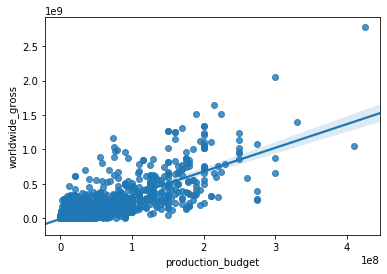

In [45]:
sns.regplot(x='production_budget',y='worldwide_gross',data=merge_data)

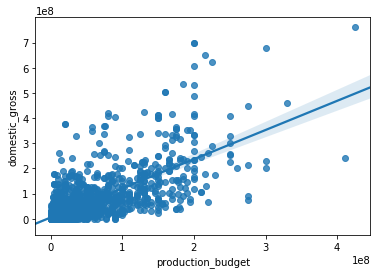

In [46]:
sns.regplot(x='production_budget',y='domestic_gross',data=merge_data)

In [47]:

sns.barplot(x='movies_name',y='worldwide_gross',data=topten_movie_data)

NameError: name 'topten_movie_data' is not defined

In [48]:
merge_data.sort_values('worldwide_gross')

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,movies_name,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
221,"[28, 18, 53]",35402,en,Icarus,5.002,2010-09-10,Icarus,5.2,42,Icarus,91,"Feb 9, 2010",Icarus,6000000,0,0
155,"[10749, 878]",59457,en,Womb,8.483,2010-07-15,Womb,6.1,159,Womb,12,"Mar 30, 2012",Womb,13000000,0,0
1398,"[53, 35, 10749, 18]",278316,en,Da Sweet Blood of Jesus,2.607,2014-06-22,Da Sweet Blood of Jesus,4.6,33,Da Sweet Blood of Jesus,56,"Jan 13, 2015",Da Sweet Blood of Jesus,1250000,0,0
1397,[18],294086,en,Tiger Orange,2.620,2014-07-26,Tiger Orange,6.2,8,Tiger Orange,99,"Jul 7, 2015",Tiger Orange,100000,0,0
1396,"[80, 53, 18]",164286,en,Down and Dangerous,2.621,2014-02-14,Down and Dangerous,4.3,9,Down and Dangerous,22,"Feb 14, 2014",Down and Dangerous,50000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,The Avengers,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
1483,"[28, 80, 53]",168259,en,Furious 7,20.396,2015-04-03,Furious 7,7.3,6538,Furious 7,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794
1478,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,Jurassic World,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
2182,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200


AttributeError: module 'seaborn' has no attribute 'plt'

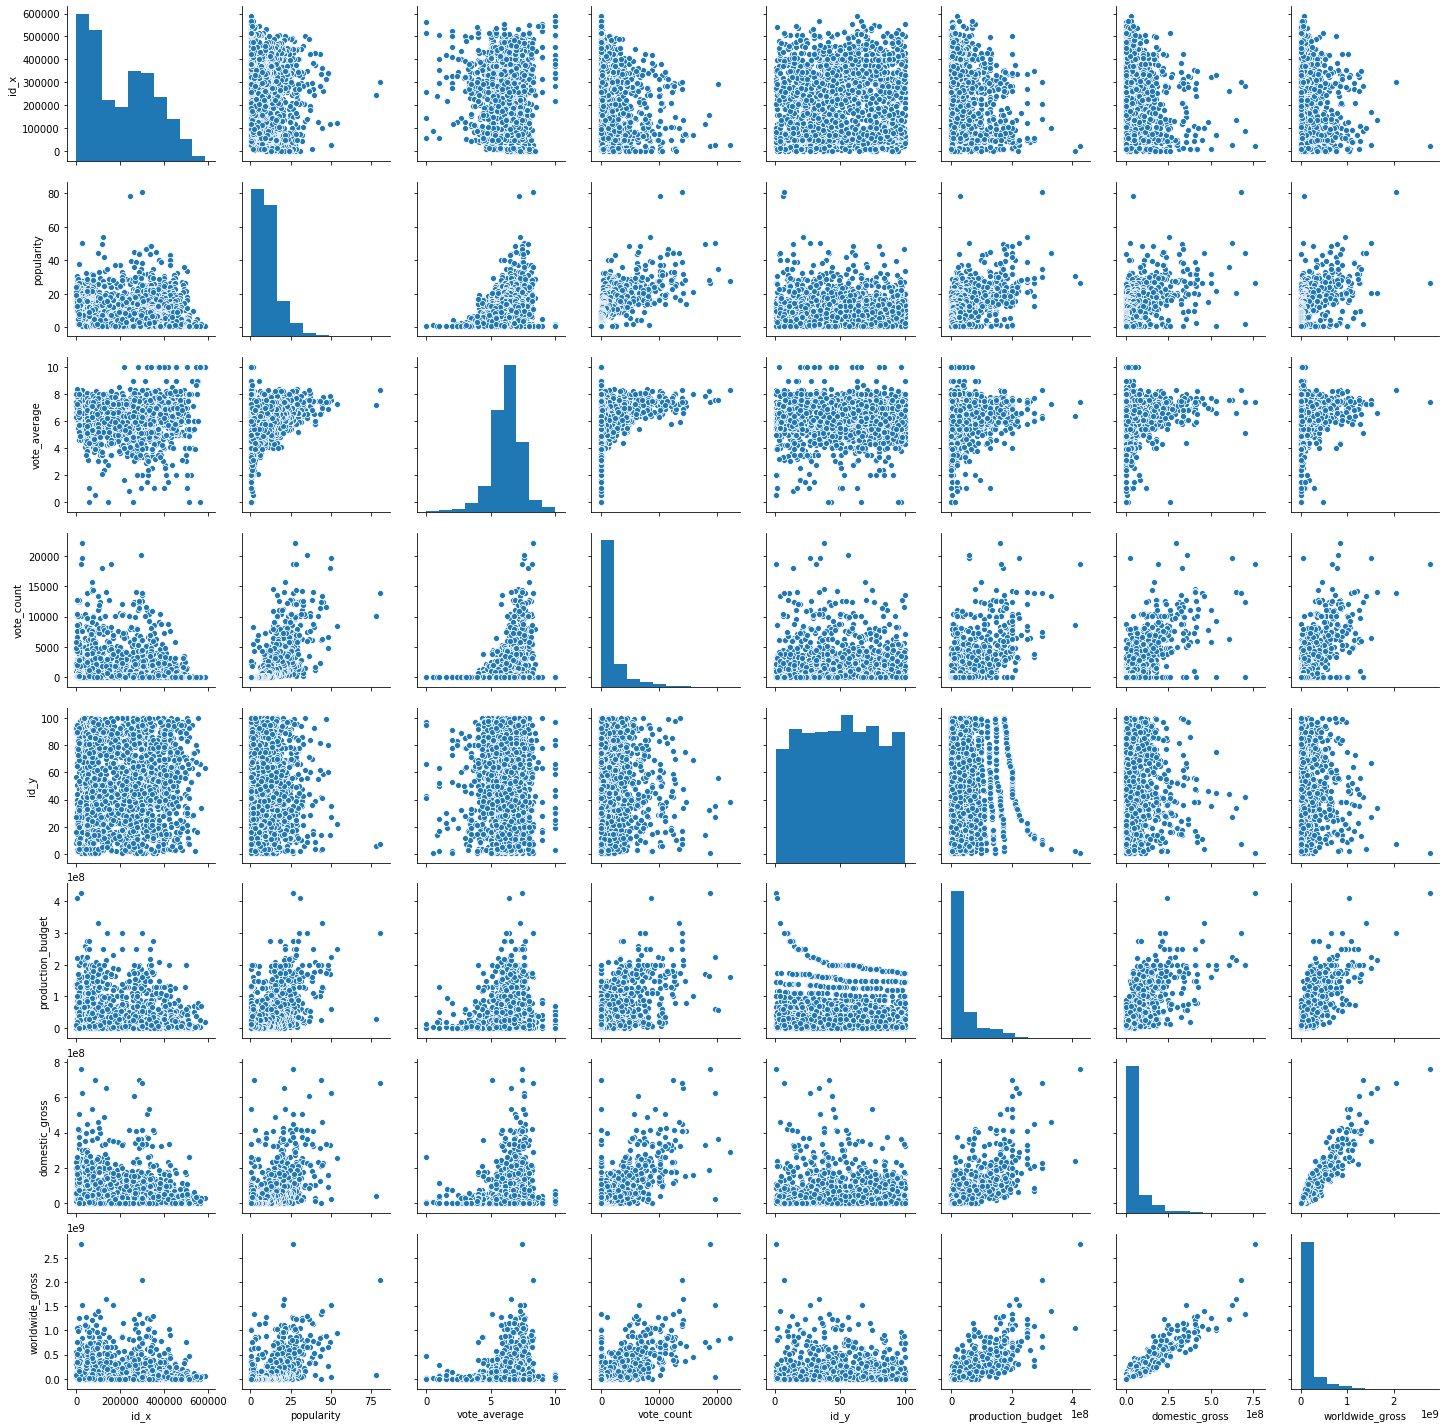

In [54]:
sns.pairplot(merge_data)
sns.plt.show()

In [ ]:
movies_view = sns.barplot(x='movies_name',y= 'worldwide_gross',data=merge_data)

In [ ]:
merge_data.head()

In [ ]:
test=pd.DataFrame({'name':['$1,000',200,'$300'],'item':['monitor','mouse','pad']})
test

In [ ]:
test=replace_all_test(test,'name')
test

In [ ]:
sns.boxenplot('item','name',data=test)

In [ ]:
test['name']=test['name'].map(lambda x : x.replace(',','') if type(x) is str else x)
test['name'] =test['name'].map(lambda x : x.replace('$','') if type(x) is str else x)
test

In [ ]:
for i in test['name']:
    if type(i) is str:
       print(type(i))

In [ ]:
def replace_all_test(df,column_name):
    df[column_name]=df[column_name].map(lambda x :  x.replace(',','') if type(x) is str else x)
    df[column_name]=df[column_name].map(lambda x :  x.replace('$','') if type(x) is str else x )

    return(df)

In [ ]:
test['name'].astype(float)

In [ ]:
test.info()

In [ ]:
test['name']=replace_comma_dollor(test['name'])
test

In [ ]:
dict_text={'$':'' ,',':''}
def replace_all(text,dic):
     df.map(lambda x : x.replace(',',''))
     df.map(lambda x : x.replace('$',''))
     return(df)              

In [ ]:
x='$1,000'
b=x.replace(',','')
c=b.replace('$','')
c

In [ ]:
for i in test['name']:
    name_test=i.split()
    print(name_test)

In [ ]:
sns.regplot('production_budget','worldwide_gross',data=merge_data)

In [ ]:
merge_data.info()

In [ ]:
merge_dd

In [128]:
original_movieinfo = pd.read_csv("data/rt.movie_info.tsv",sep='\t')
movieinfo_df=original_movieinfo.copy()

In [129]:
movieinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
